In [5]:
import pandas as pd

df = pd.read_excel("Student Mental health.xlsx")

print(df.head())

print(df.shape)


             Timestamp Choose your gender   Age What is your course?  \
0  2020-08-07 12:02:00             Female  18.0          Engineering   
1  2020-08-07 12:04:00               Male  21.0    Islamic education   
2  2020-08-07 12:05:00               Male  19.0                  BIT   
3  2020-08-07 12:06:00             Female  22.0                 Laws   
4  2020-08-07 12:13:00               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                     Yes                   No                       Yes   
1                 

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    str    
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    str    
 4   Your current year of Study                    101 non-null    str    
 5   What is your CGPA?                            101 non-null    str    
 6   Marital status                                101 non-null    str    
 7   Do you have Depression?                       101 non-null    str    
 8   Do you have Anxiety?                          101 non-null    str    
 9   Do you have Panic attack?                     101 non-null    str    
 10  D

In [7]:
# Clean column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("?", "", regex=False)
)

df.columns


Index(['timestamp', 'choose_your_gender', 'age', 'what_is_your_course',
       'your_current_year_of_study', 'what_is_your_cgpa', 'marital_status',
       'do_you_have_depression', 'do_you_have_anxiety',
       'do_you_have_panic_attack',
       'did_you_seek_any_specialist_for_a_treatment'],
      dtype='str')

In [8]:
df['do_you_have_depression']

0      Yes
1       No
2      Yes
3      Yes
4       No
      ... 
96      No
97     Yes
98     Yes
99      No
100     No
Name: do_you_have_depression, Length: 101, dtype: str

In [9]:
df.head(3)

,timestamp,choose_your_gender,age,what_is_your_course,your_current_year_of_study,what_is_your_cgpa,marital_status,do_you_have_depression,do_you_have_anxiety,do_you_have_panic_attack,did_you_seek_any_specialist_for_a_treatment
0,2020-08-07 12:02:00,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,2020-08-07 12:04:00,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,2020-08-07 12:05:00,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

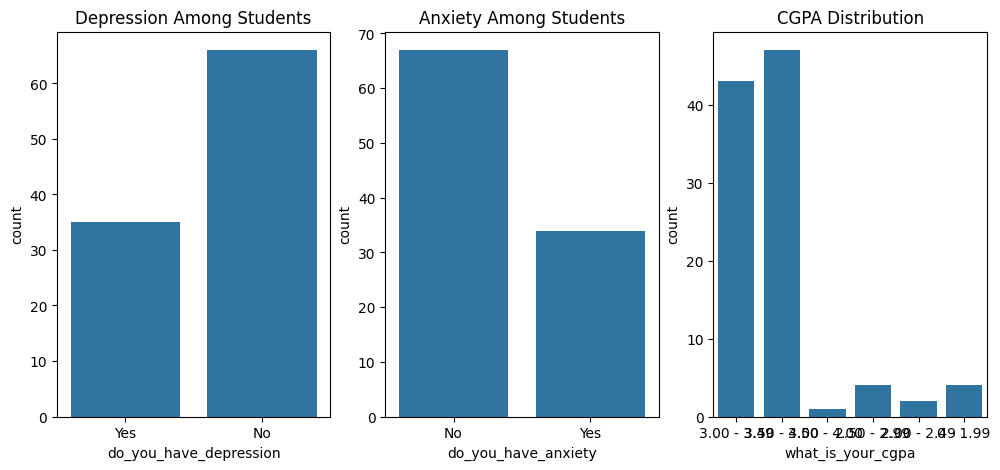

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.countplot(data=df, x='do_you_have_depression', ax=axes[0])
axes[0].set_title("Depression Among Students")

sns.countplot(data=df, x='do_you_have_anxiety', ax=axes[1])
axes[1].set_title("Anxiety Among Students")

sns.countplot(data=df, x='what_is_your_cgpa', ax=axes[2])
axes[2].set_title("CGPA Distribution")
plt.show()


In [13]:
df['what_is_your_cgpa'].value_counts()

what_is_your_cgpa
3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         4
2.00 - 2.49      2
3.50 - 4.00      1
Name: count, dtype: int64

In [14]:
df['what_is_your_cgpa'].value_counts()

what_is_your_cgpa
3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         4
2.00 - 2.49      2
3.50 - 4.00      1
Name: count, dtype: int64

In [15]:

#mapping out the cgpa to be inbetween, so its neither too high or too low.

cgpa_map = {
    '0 - 1.99': 1.5,
    '2.00 - 2.49': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.49': 3.25,
    '3.50 - 4.00': 3.75
}


df['cgpa_numeric'] = df['what_is_your_cgpa'].map(cgpa_map)

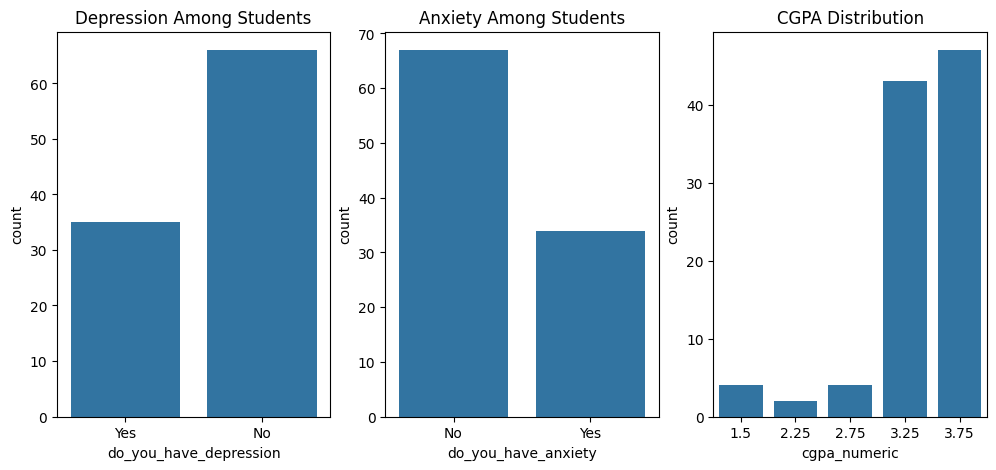

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.countplot(data=df, x='do_you_have_depression', ax=axes[0])
axes[0].set_title("Depression Among Students")

sns.countplot(data=df, x='do_you_have_anxiety', ax=axes[1])
axes[1].set_title("Anxiety Among Students")

sns.countplot(data=df, x='cgpa_numeric', ax=axes[2])
axes[2].set_title("CGPA Distribution")
plt.show()


In [17]:
df['year_numeric'] = (
    df['your_current_year_of_study']
    .astype(str)
    .str.extract(r'(\d)')
    .astype(int)
)


In [18]:
df.head()

,timestamp,choose_your_gender,age,what_is_your_course,your_current_year_of_study,what_is_your_cgpa,marital_status,do_you_have_depression,do_you_have_anxiety,do_you_have_panic_attack,did_you_seek_any_specialist_for_a_treatment,cgpa_numeric,year_numeric
0,2020-08-07 12:02:00,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,3.25,1
1,2020-08-07 12:04:00,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,3.25,2
2,2020-08-07 12:05:00,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,3.25,1
3,2020-08-07 12:06:00,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,3.25,3
4,2020-08-07 12:13:00,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,3.25,4


In [19]:

# 1) Define the function
def convert_cgpa_to_number(cgpa_range):
    if pd.isna(cgpa_range):
        return None

    cgpa_range = str(cgpa_range).strip()

    # Example: "3.00 - 3.49"
    parts = cgpa_range.split('-')
    lower = float(parts[0].strip())
    upper = float(parts[1].strip())

    return (lower + upper) / 2


# 2) Prove the function exists (debug)
print("Function exists?", "convert_cgpa_to_number" in globals())

# 3) Apply it
df['cgpa_numeric'] = df['what_is_your_cgpa'].apply(convert_cgpa_to_number)

# 4) Show result
print(df[['what_is_your_cgpa', 'cgpa_numeric']].head(10))


Function exists? True
  what_is_your_cgpa  cgpa_numeric
0       3.00 - 3.49         3.245
1       3.00 - 3.49         3.245
2       3.00 - 3.49         3.245
3       3.00 - 3.49         3.245
4       3.00 - 3.49         3.245
5       3.50 - 4.00         3.750
6      3.50 - 4.00          3.750
7       3.50 - 4.00         3.750
8       2.50 - 2.99         2.745
9       3.50 - 4.00         3.750


In [20]:
pressure_depression = (
    df.groupby('academic_pressure')['do_you_have_depression']
      .mean()
      .reset_index()
)

pressure_depression

KeyError: 'academic_pressure'

In [ ]:
df['depressed_and_anxious'] = (
    (df['do_you_have_depression'] == 'Yes') &
    (df['do_you_have_anxiety'] == 'Yes')
).astype(int)

In [ ]:
percentage_depressed_and_anxious = df['depressed_and_anxious'].mean() * 100

In [ ]:
percentage

np.float64(17.82178217821782)

In [ ]:
df['do_you_have_depression_num'] = (
    df['do_you_have_depression'] == 'Yes'
).astype(int)

percentage_depressed = df['do_you_have_depression_num'].mean() * 100
percentage_depressed

np.float64(34.65346534653465)

In [ ]:
df['do_you_have_anxiety_num'] = (
    df['do_you_have_anxiety'] == 'Yes'
).astype(int)

do_you_have_anxiety_num = df['do_you_have_anxiety_num'].mean() * 100
do_you_have_anxiety_num

np.float64(33.663366336633665)

In [ ]:
corr_vars = [
    'academic_pressure',
    'cgpa_numeric',
    'sleep_duration',
    'depression_num',
    'anxiety_num'
]

corr_matrix = df[corr_vars].corr(method='pearson')
corr_matrix

In [21]:
df['depression'] = (df['do_you_have_depression'] == 'Yes').astype(int)
df['anxiety'] = (df['do_you_have_anxiety'] == 'Yes').astype(int)
df['panic_attack'] = (df['do_you_have_panic_attack'] == 'Yes').astype(int)

In [22]:
corr_vars = [
    'age',
    'cgpa_numeric',
    'depression',
    'anxiety',
    'panic_attack'
]

spearman_corr = df[corr_vars].corr(method='spearman')
spearman_corr

,age,cgpa_numeric,depression,anxiety,panic_attack
age,1.000000,-0.029319,-0.057578,-0.094490,0.061818
cgpa_numeric,-0.029319,1.000000,-0.113802,0.118976,0.089003
depression,-0.057578,-0.113802,1.000000,0.273764,0.246842
anxiety,-0.094490,0.118976,0.273764,1.000000,0.084478
panic_attack,0.061818,0.089003,0.246842,0.084478,1.000000


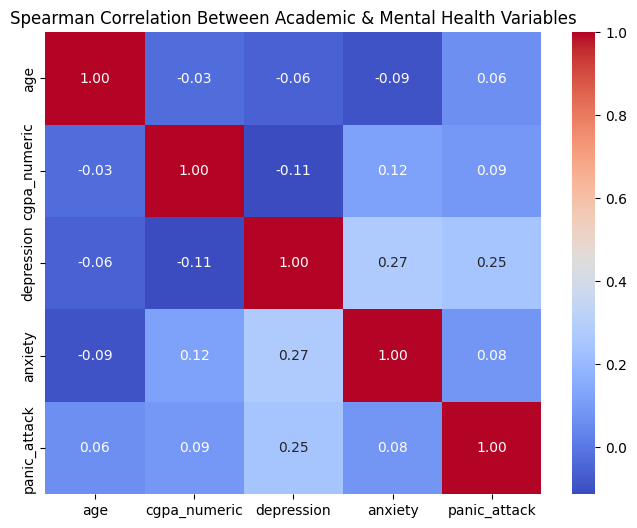

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Between Academic & Mental Health Variables")
plt.show()

In [24]:
from scipy.stats import pointbiserialr

# CGPA vs mental health
r_dep_cgpa, p_dep_cgpa = pointbiserialr(df['depression'], df['cgpa_numeric'])
r_anx_cgpa, p_anx_cgpa = pointbiserialr(df['anxiety'], df['cgpa_numeric'])

# Age vs mental health
r_dep_age, p_dep_age = pointbiserialr(df['depression'], df['age'])
r_anx_age, p_anx_age = pointbiserialr(df['anxiety'], df['age'])

r_dep_cgpa, p_dep_cgpa, r_anx_cgpa, p_anx_cgpa

(np.float64(0.0418074033740781),
 np.float64(0.6780606920585167),
 np.float64(0.17294980554879064),
 np.float64(0.08371106875947154))

In [25]:
from scipy.stats import chi2_contingency

cont_table = pd.crosstab(
    df['what_is_your_cgpa'],
    df['do_you_have_depression']
)

chi2, p, dof, expected = chi2_contingency(cont_table)
chi2, p

(np.float64(11.395381449327514), np.float64(0.04408044781159164))

In [28]:
cgpa_depression_rate = (
    df.groupby('what_is_your_cgpa')['do_you_have_depression']
      .apply(lambda x: (x == 'Yes').mean() * 100)
)

cgpa_depression_rate

what_is_your_cgpa
0 - 1.99          0.000000
2.00 - 2.49       0.000000
2.50 - 2.99      75.000000
3.00 - 3.49      44.186047
3.50 - 4.00      25.531915
3.50 - 4.00     100.000000
Name: do_you_have_depression, dtype: float64

In [34]:
X = df[['cgpa_numeric', 'age']]
X.isna().sum()

cgpa_numeric    0
age             1
dtype: int64

In [35]:
df['depression'].isna().sum()

np.int64(0)

In [36]:
df[df[['cgpa_numeric', 'age']].isna().any(axis=1)][['what_is_your_cgpa', 'cgpa_numeric', 'age']].head(10)

,what_is_your_cgpa,cgpa_numeric,age
43,0 - 1.99,0.995,NaN


In [37]:
import statsmodels.api as sm

model_df = df[['depression', 'cgpa_numeric', 'age']].dropna()

X = model_df[['cgpa_numeric', 'age']]
X = sm.add_constant(X)

y = model_df['depression']

model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.644726
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             depression   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Feb 2026   Pseudo R-squ.:                0.004202
Time:                        21:05:03   Log-Likelihood:                -64.473
converged:                       True   LL-Null:                       -64.745
Covariance Type:            nonrobust   LLR p-value:                    0.7618
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4571      2.208      0.207      0.836      -3.870       4.784
cgpa_numeric     0.0553      0.398      0.139      0.889      -0.725       0.836
age             -0.0617      0.086     -0.721      0.471      -0.229       0.106
================================================================================
"""